In [2]:
import fs
import util 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
sns.set(style='ticks', palette='Set2')
sns.set_context("talk", font_scale=1.2)
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from pathlib import Path


In [3]:
%load_ext autoreload
%autoreload 2


In [3]:
num_examples = 200
classe1 = np.column_stack((np.random.normal(2, 0.4, num_examples), np.random.normal(2, 0.4, num_examples) + 3))
classe1 = np.row_stack((classe1, np.column_stack((np.random.normal(5, 0.4, num_examples), np.random.normal(5, 0.4, num_examples)- 3))))

classe2 = np.random.normal(2, 0.5, num_examples * 2).reshape(num_examples, 2)
classe2 = np.row_stack((classe2, np.random.normal(4.5, 0.5, num_examples * 2).reshape(num_examples, 2)))
X = np.row_stack((classe1, classe2))
y = np.array([1] * num_examples*2 + [-1] * num_examples*2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

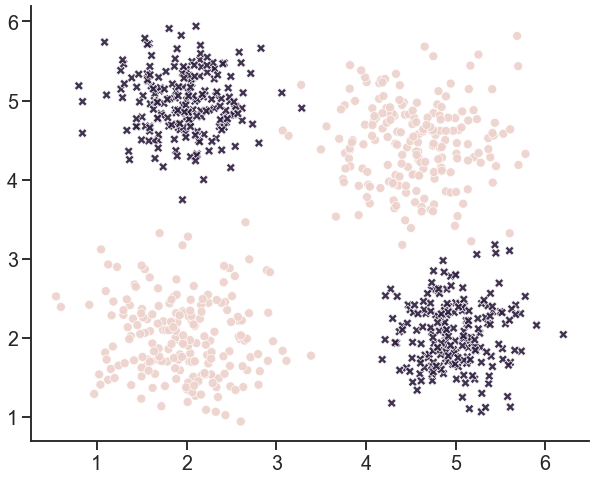

In [5]:
fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X[:,0], X[:,1], hue = y, style = y, legend= None, alpha = 0.9)
sns.despine()


In [6]:
W, Z = util.elm_train(X_train, y_train, hidden_dim = 20)


In [7]:
y_pred = util.elm_predict(X_test, Z, W)

In [8]:
accuracy_score(y_test, y_pred)

0.9916666666666667

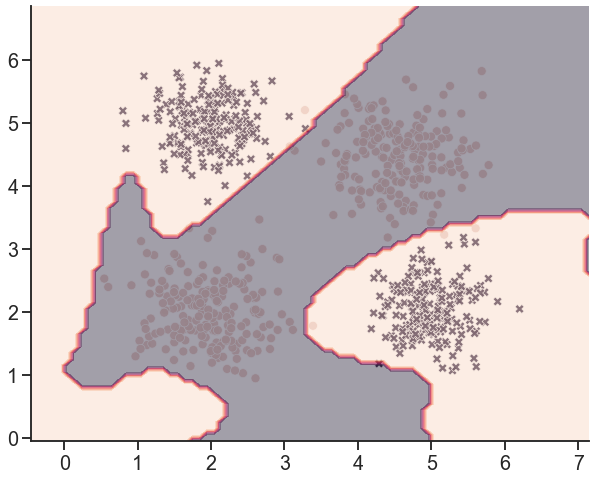

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, .1))
Z = util.elm_predict(np.c_[xx.ravel(), yy.ravel()], Z, W)
Z = Z.reshape(xx.shape)  

fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X[:,0], X[:,1], hue = y, style = y, legend= None, alpha = 0.9)
plt.contourf(xx, yy, Z, alpha=0.4)
sns.despine()

In [79]:
W, Z, r = util.kmeans_rbf_train(X_train, y_train, hidden_dim = 5)



In [80]:
y_pred = util.elm_rbf_predict(X_test, Z, W, r)
accuracy_score(y_test, y_pred)

0.9958333333333333

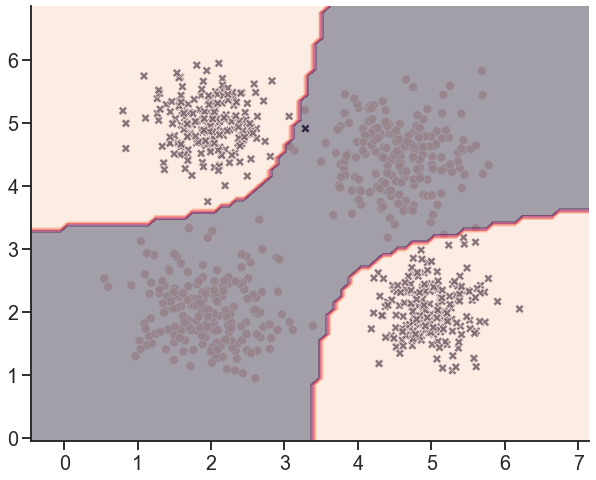

In [81]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, .1))
Z = util.elm_rbf_predict(np.c_[xx.ravel(), yy.ravel()], Z, W, r)
Z = Z.reshape(xx.shape)  

fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X[:,0], X[:,1], hue = y, style = y, legend= None, alpha = 0.9)
plt.contourf(xx, yy, Z, alpha=0.4)
sns.despine()

In [172]:
cancer = pd.read_csv("wdbc.data", header = None)
cancer.pop(0)
heart = pd.read_csv("heart.dat", header = None, sep = ' ')

In [173]:
heart[13] = np.where(heart[13] == 2, 1, -1)
heart_labels = heart.pop(13)
heart.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [174]:
cancer[1] = np.where(cancer[1] == "M", 1, -1)
cancer_labels = cancer.pop(1)
cancer.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [175]:
datasets = { 'heart' : (heart, heart_labels), 'cancer' : (cancer, cancer_labels)}

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_tests =  50
clusters = range(3, 50, 2)

# data = []
for c in clusters:
    print(c)
    for i in range(num_tests):
        for ds_name, ds in datasets.items():
            X_train, X_test, y_train, y_test = train_test_split(ds[0].values, ds[1].values, test_size=0.2, random_state = i)

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # imputer = SimpleImputer(strategy = 'median')
            # X_train = imputer.fit_transform(X_train)
            # X_test = imputer.transform(X_test)

            W, Z = util.elm_train(X_train.copy(), y_train.copy(), hidden_dim = c)
            y_pred = util.elm_predict(X_test.copy(), Z, W)
            df_result = pd.DataFrame({'clusters': c, 'accuracy': accuracy_score(y_test, y_pred), 'test_number': i, 'model': 'ELM', 'dataset': ds_name}, index = [0])
            data.append(df_result)

            W, Z, r = util.elm_rbf_train(X_train.copy(), y_train.copy(), hidden_dim = c)
            y_pred = util.elm_rbf_predict(X_test.copy(), Z, W, r)
            df_result = pd.DataFrame({'clusters': c, 'accuracy': accuracy_score(y_test, y_pred), 'test_number': i, 'model': 'RBF_ELM', 'dataset': ds_name}, index = [0])
            data.append(df_result)

            W, Z, r = util.kmeans_rbf_train(X_train.copy(), y_train.copy(), hidden_dim = c)
            y_pred = util.elm_rbf_predict(X_test.copy(), Z, W, r)
            df_result = pd.DataFrame({'clusters': c, 'accuracy': accuracy_score(y_test, y_pred), 'test_number': i, 'model': 'RBF_KMEANS', 'dataset': ds_name}, index = [0])
            data.append(df_result)


result = pd.concat(data, ignore_index = True)

3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49


In [4]:
result = pd.read_csv('teste_rbf2.csv')

In [68]:
result[(result['model'] == 'RBF_KMEANS') & (result['dataset'] == 'cancer')].groupby("clusters")['accuracy'].mean().reset_index()

,clusters,accuracy
0,2,0.919649
1,3,0.932456
2,4,0.946316
3,5,0.943509
4,6,0.958947
5,7,0.959123
6,8,0.959474
7,9,0.960000
8,10,0.962807
9,11,0.961228


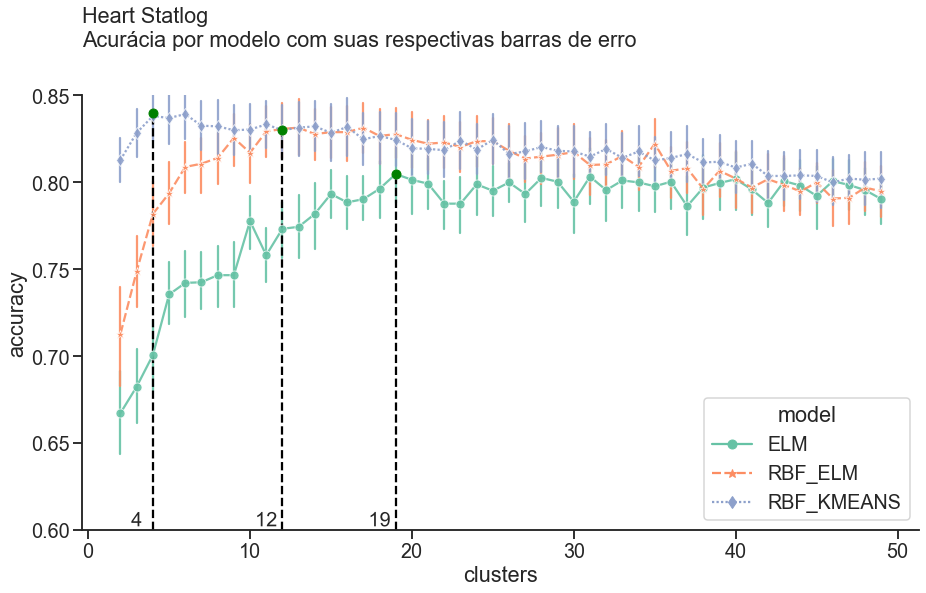

In [77]:
import matplotlib.patheffects as path_effects


fig = plt.figure(figsize=(15, 8))

max_values = {'ELM' : (19, 00.805), 
                'RBF_ELM' : (12, 0.83),
                'RBF_KMEANS' : (4, 0.84)}


ax = sns.lineplot('clusters', 'accuracy', hue = 'model', style = 'model', alpha = 0.9, err_style="bars", markers= ['o', '*', 'd'], data = result[result['dataset'] == 'heart'])
ax.set_ylim(0.60, 0.85)
title = "Heart Statlog \nAcurácia por modelo com suas respectivas barras de erro"
ax.set_title(title, x=0, y=1.1, ha="left")

for model, data in max_values.items():
    plt.plot(data[0], data[1], "go")
    plt.vlines(x=data[0], ymin = 0.6, ymax = data[1], color='k', linestyle='--')
    plt.text(data[0]-1, 0.60, data[0], ha='center', va='bottom', fontsize=20, path_effects=[path_effects.withStroke(linewidth=2, foreground='w')])

sns.despine()
plt.savefig("heart.pdf")
plt.show()

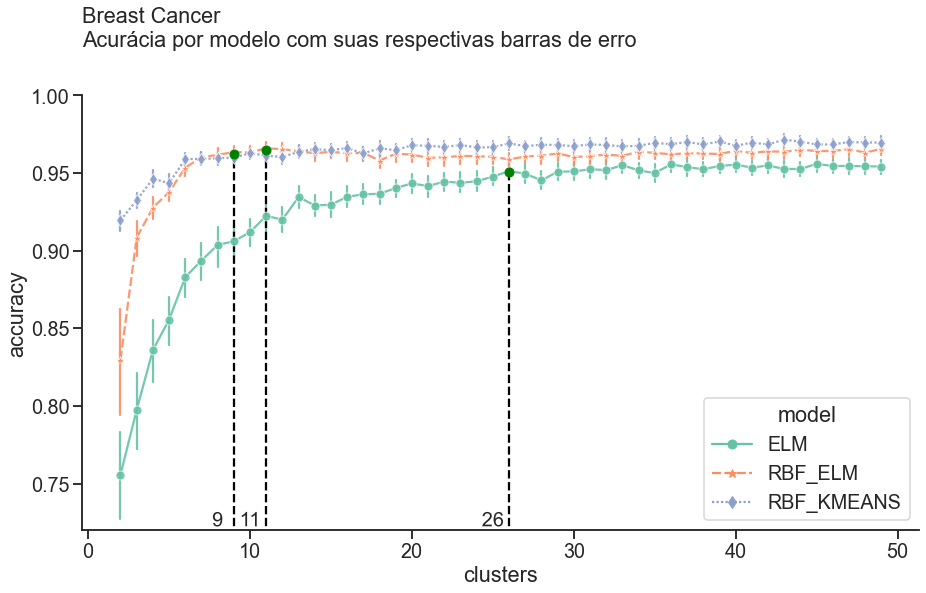

In [76]:
import matplotlib.patheffects as path_effects


fig = plt.figure(figsize=(15, 8))

max_values = {'ELM' : (26, 0.951), 
                'RBF_ELM' : (11, 0.965),
                'RBF_KMEANS' : (9, 0.962)}


ax = sns.lineplot('clusters', 'accuracy', hue = 'model', style = 'model', alpha = 0.9, err_style="bars", markers= ['o', '*', 'd'], data = result[result['dataset'] == 'cancer'])
ax.set_ylim(0.72, 1.0)
title = "Breast Cancer \nAcurácia por modelo com suas respectivas barras de erro"
ax.set_title(title, x=0, y=1.1, ha="left")

for model, data in max_values.items():
    plt.plot(data[0], data[1], "go")
    plt.vlines(x=data[0], ymin = 0.6, ymax = data[1], color='k', linestyle='--')
    plt.text(data[0]-1, 0.72, data[0], ha='center', va='bottom', fontsize=20, path_effects=[path_effects.withStroke(linewidth=2, foreground='w')])

sns.despine()
plt.savefig("cancer.pdf")
plt.show()

In [94]:
result[(result['model'] == 'RBF_KMEANS') & (result['dataset'] == 'cancer')].groupby("clusters")['accuracy'].std().reset_index()

,clusters,accuracy
0,2,0.022512
1,3,0.017477
2,4,0.019303
3,5,0.021056
4,6,0.014768
5,7,0.014464
6,8,0.015130
7,9,0.015054
8,10,0.013562
9,11,0.015047


In [71]:
len(result[result['dataset'] == 'heart'])

7200

In [184]:
result.to_csv('teste_rbf2.csv', index = False)

In [77]:
pd.DataFrame({'clusters': 1, 'accuracy': 112, 'test_number': 2, 'model': 'ELM'}, index = [0])

,clusters,accuracy,test_number,model
0,1,112,2,ELM
